In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from LinearController_ import LinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

In [4]:
# Task 2.4

In [5]:
target = CartPole(False)
model_2_4 = NonLinearObserver.initialize_model(N=14, M=9, with_action=True)
model_2_4.load_model("./models/2_2__14__9")

In [6]:
# Fit linear controller

In [7]:
controller = LinearController.get_linear_controller()
controller.get_params()
controller.p = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

In [8]:
# From section 2.2, here are the ranges for which the models still tracks the system decently well

cart_pos_lim = (-2, 2)
cart_vel_lim = (-2.5, 2.5)
pole_vel_lim = (-5, 5)
pole_ang_lim = (-np.pi, np.pi)
force_ang_lim = (-6, 6)




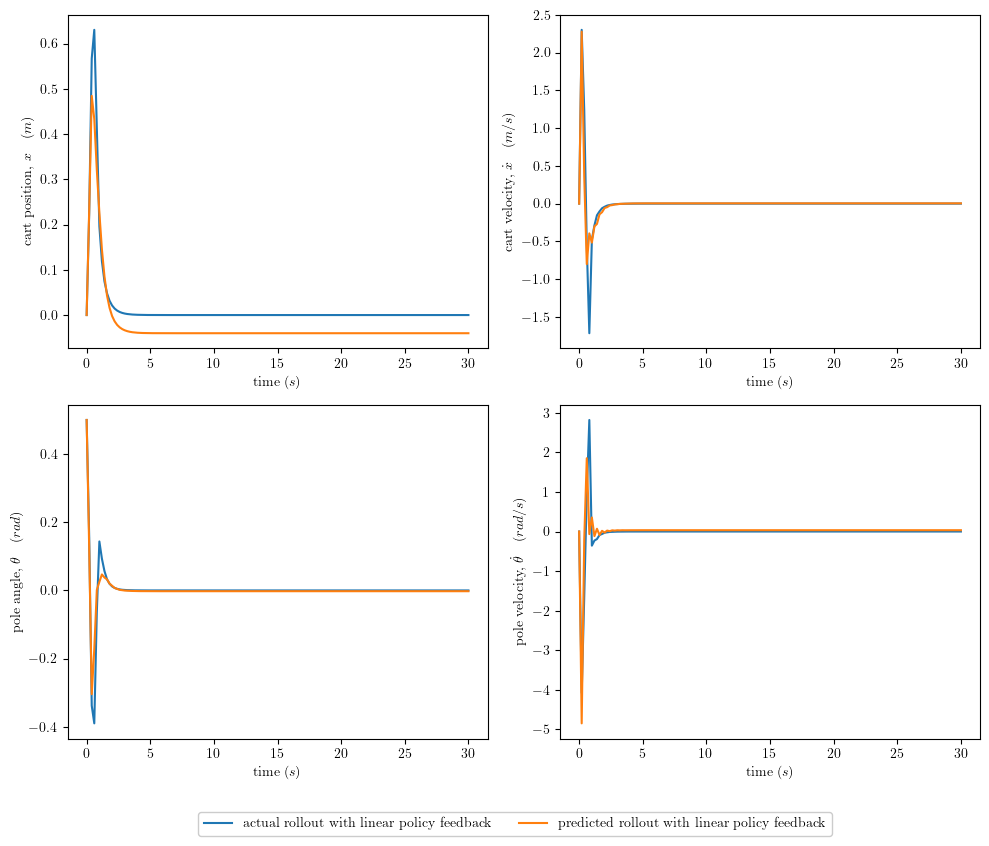

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.5, 0, 0])

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)
x_model, y_model = model_2_4.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
plot_rollout(x_model, y_model, axs, fig, label='predicted rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

fig.savefig("./assets2_revised/t2_4__rollout_unoptimized.png")


In [ ]:
# Now what happens if we change the initial condition?

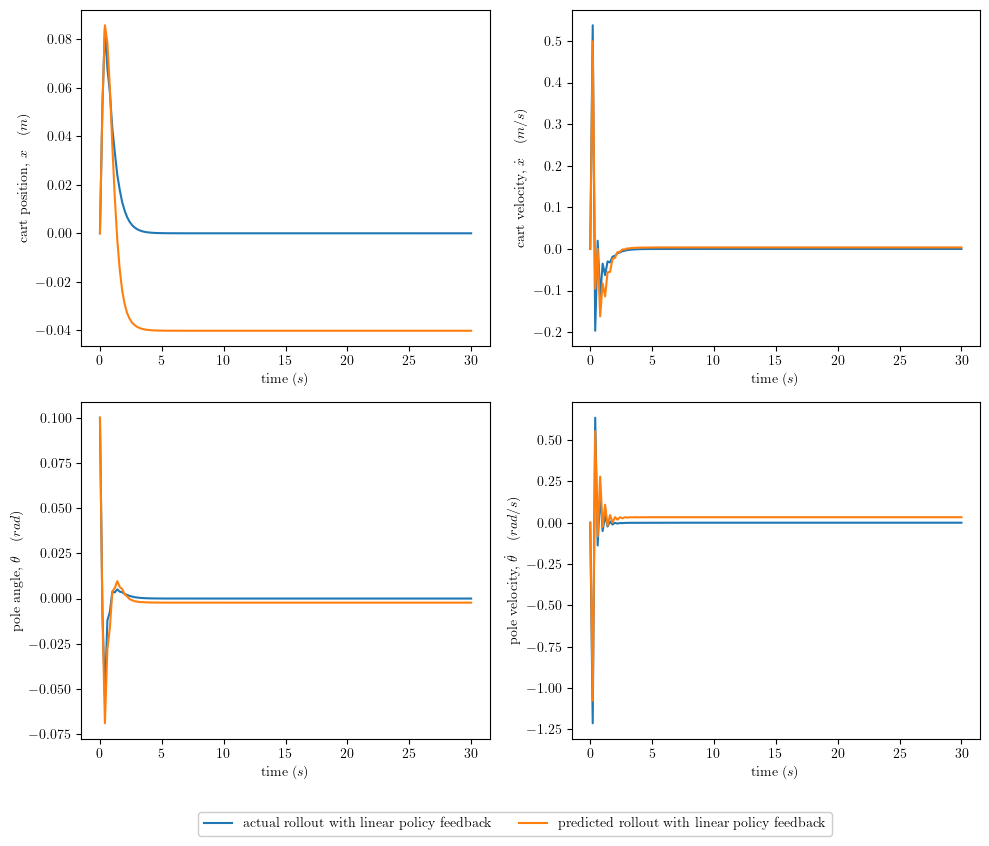

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)
x_model, y_model = model_2_4.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
plot_rollout(x_model, y_model, axs, fig, label='predicted rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

# fig.savefig("./assets2_revised/t2_4__rollout_unoptimized.png")

In [10]:
# Try reoptimizing linear policy

In [11]:
from optimizer import Optimizer

optimizer = Optimizer()

s0 = np.array([0, 0, 0, 0.5, 0])
p0 = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])
p_opt, loss = optimizer.optimize_linear(model_2_4, controller, s0, p0, verbose=False, loss_func=1, time=3, remap=True)

p_opt, loss

(array([-0.25849865,  0.9197524 , 13.81567292,  2.21786008]),
 1.1016441449757397)

In [12]:
# Now check reoptimzied linear policy

controller2 = LinearController.get_linear_controller()
controller2.get_params()
controller2.p = np.array([-0.25849865,  0.9197524 , 13.81567292,  2.21786008])

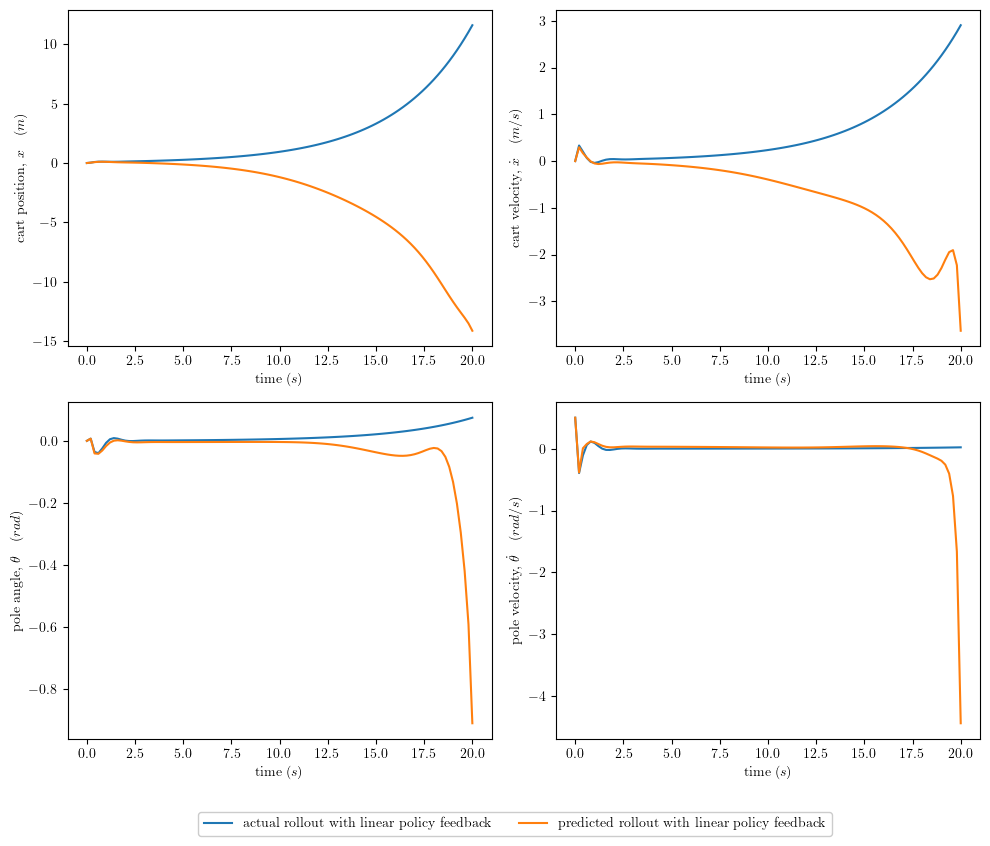

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0, 0.5, 0])

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller2, time=20)
x_model, y_model = model_2_4.simulate_with_feedback(state=s0, remap=True, controller=controller2, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
plot_rollout(x_model, y_model, axs, fig, label='predicted rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

# fig.savefig("./assets2_revised/t2_4__rollout_unoptimized.png")

In [ ]:
# Still poor, try optimizing over longer time horizon

In [9]:
from optimizer import Optimizer

optimizer = Optimizer()

s0 = np.array([0, 0, 0, 0.5, 0])
p0 = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])
p_opt, loss = optimizer.optimize_linear(model_2_4, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)

p_opt, loss

(array([ 1.58899497,  1.27929362, 17.74784958,  2.40820563]),
 1.4539521196229552)

In [10]:
# Now check reoptimzied linear policy

controller2 = LinearController.get_linear_controller()
controller2.get_params()
# controller2.p = np.array([ 6.9732875 ,  2.73896609, 22.9364886 ,  3.05511583])
controller2.p = np.array([ 1.58899497,  1.27929362, 17.74784958,  2.40820563])

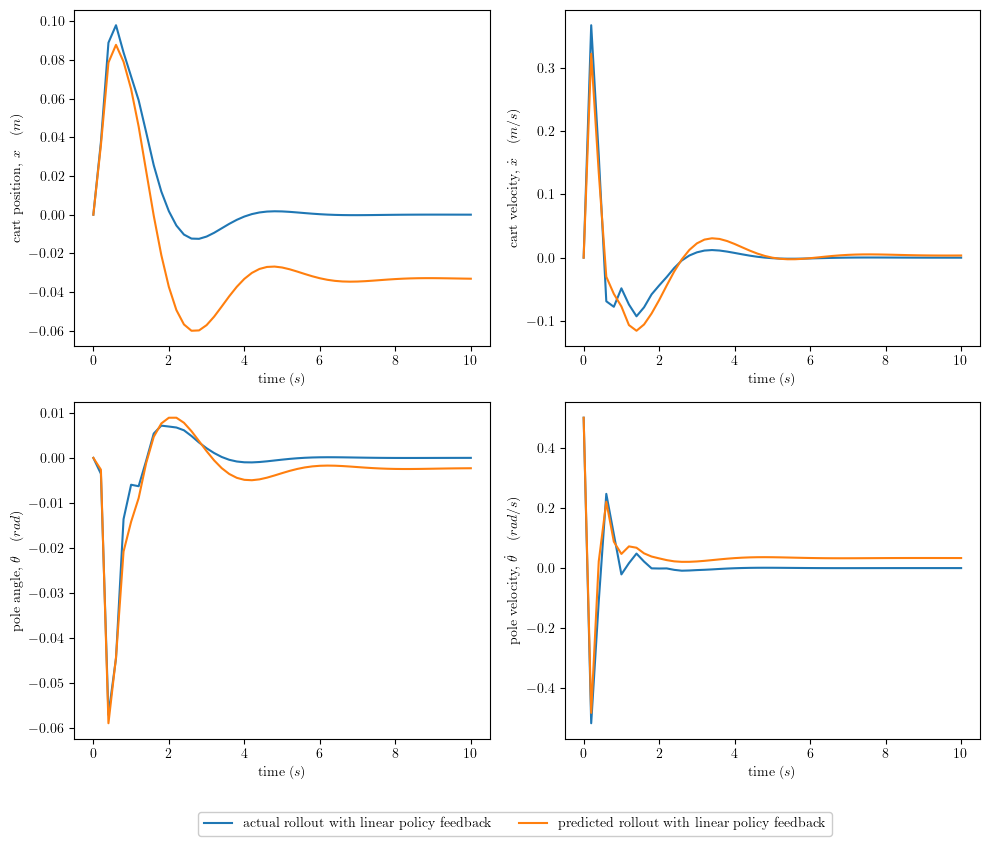

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0, 0.5, 0])

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller2, time=10)
x_model, y_model = model_2_4.simulate_with_feedback(state=s0, remap=True, controller=controller2, time=10)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
plot_rollout(x_model, y_model, axs, fig, label='predicted rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

# fig.savefig("./assets2_revised/t2_4__rollout_unoptimized.png")

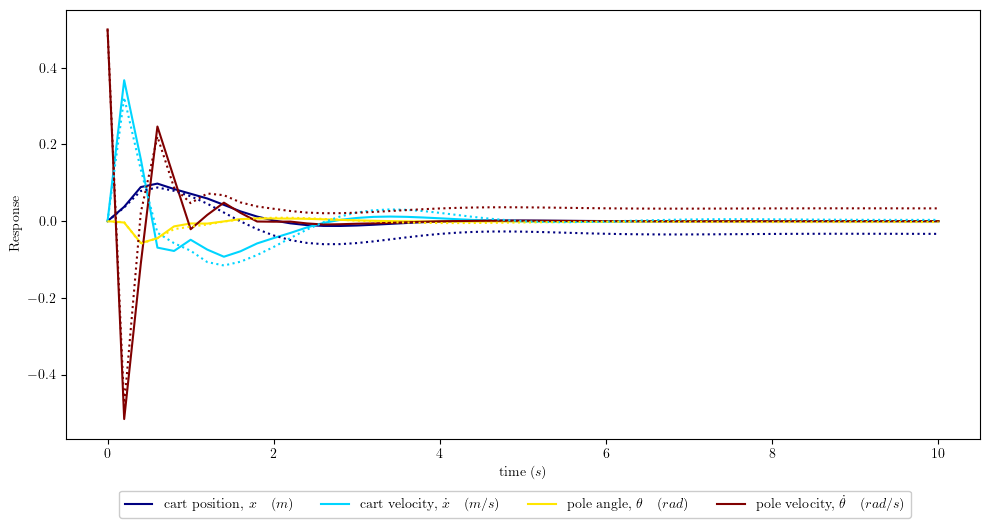

In [13]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')


plot_rollout_single(x_target, y_target, ax, fig, color=colors, linestyle='solid', legend=True)
plot_rollout_single(x_model, y_model, ax, fig, color=colors, linestyle='dotted', legend=False)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
# fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

In [ ]:
# Controller still works for actual model
# It works for simulated model too, but note that the roll out for the simulated model give
# a constant cart displacement, when the actual cart velocity settles at a non-zero value
# this shows that the model struggles to model the actual dynamics across long time horizons
# as we expect the cart displacement to be linearly increasing for some constant non-zero value

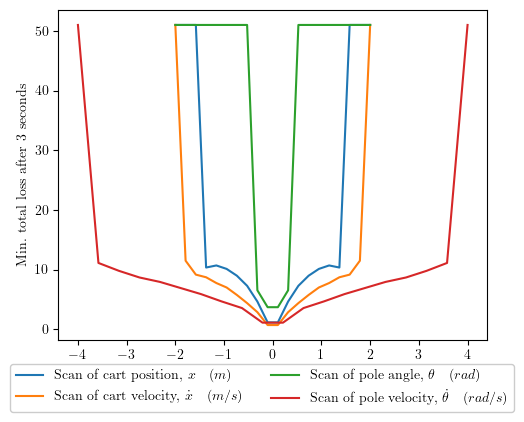

In [20]:
from optimizer import get_next_search_space_limits
from shared import STATE_LABELS, plot_loss_1D

n = 20
s0 = np.array([0., 0., 0., 0., 0.])
p_opt = np.array([ 1.58899497,  1.27929362, 17.74784958,  2.40820563])
controller.p = p_opt

limits = (
    (-2., 2.),
    (-2., 2.),
    (-2., 2.),
    (-4., 4.),
    (-6, 6)
)
scan_state_ranges = get_scan_states_ranges(n, limits)
loss_hist = np.zeros((n, 4))
s_hist = np.zeros((n, 4, 4))

for i in range(4):
    for j, sii in enumerate(scan_state_ranges[i]):
        si = np.copy(s0)
        si[i] = sii
        loss = optimizer.total_loss_with_feedback(target, controller2, si, p_opt, time=10, remap=True)
        
        loss_hist[j, i] = loss
        s_hist[j, i] = si[:4]

fig, ax = plt.subplots(1, 1, figsize=(5, 4), layout='tight')
for i in range(4):
    plot_loss_1D(s_hist[:, i, i], loss_hist[:, i], label=f"Scan of {STATE_LABELS[i]}", fig=fig, ax=ax, time=3)

fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)


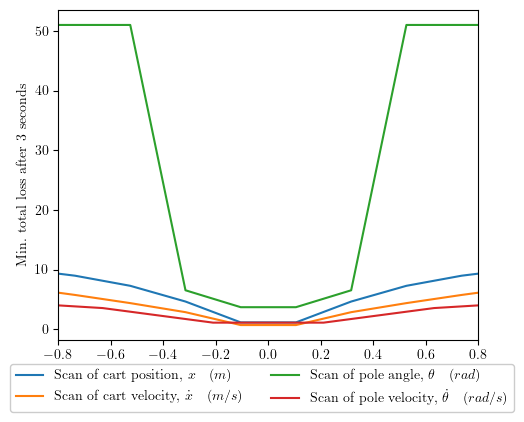

In [21]:
from optimizer import get_next_search_space_limits
from shared import STATE_LABELS, plot_loss_1D

n = 20
s0 = np.array([0., 0., 0., 0., 0.])
p_opt = np.array([ 1.58899497,  1.27929362, 17.74784958,  2.40820563])
controller.p = p_opt

limits = (
    (-2., 2.),
    (-2., 2.),
    (-2., 2.),
    (-4., 4.),
    (-6, 6)
)
scan_state_ranges = get_scan_states_ranges(n, limits)
loss_hist = np.zeros((n, 4))
s_hist = np.zeros((n, 4, 4))

for i in range(4):
    for j, sii in enumerate(scan_state_ranges[i]):
        si = np.copy(s0)
        si[i] = sii
        loss = optimizer.total_loss_with_feedback(target, controller2, si, p_opt, time=10, remap=True)
        
        loss_hist[j, i] = loss
        s_hist[j, i] = si[:4]

fig, ax = plt.subplots(1, 1, figsize=(5, 4), layout='tight')
for i in range(4):
    plot_loss_1D(s_hist[:, i, i], loss_hist[:, i], label=f"Scan of {STATE_LABELS[i]}", fig=fig, ax=ax, time=3)

ax.set(xlim=(-0.8, 0.8))
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)
